# Multiclass Classification

When you have more than two classes as an option, it's nown as **multi-class classification**


**Careful! full run lasts about 10min**

In [1]:
from sklearn.datasets import make_circles
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

Getting data from https://www.tensorflow.org/datasets/catalog/fashion_mnist


In [2]:
(train_data, train_label), (test_data, test_label) = fashion_mnist.load_data()

In [3]:
#show the first training example

print(f"Training sample:\n{train_data[0]}\n")
print(f"Training label:\n{train_label[0]}\n")

Training sample:
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1  

Label 9 is an ankle boot

In [4]:
train_data[0].shape, train_label[0].shape

((28, 28), ())

Training label:
2



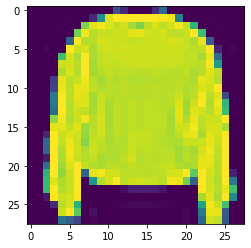

In [5]:
#plot a single sample

plt.imshow(train_data[7])
print(f"Training label:\n{train_label[7]}\n")

In [6]:
print(train_data.shape)
print("60000 samples of 28 x 28 greyscale images")

(60000, 28, 28)
60000 samples of 28 x 28 greyscale images


In [7]:
# create a list  so we can index the training labels

class_names = ['T-shirt/top', 'Trousers', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
len(class_names)

10

Text(0.5, 1.0, 'Shirt')

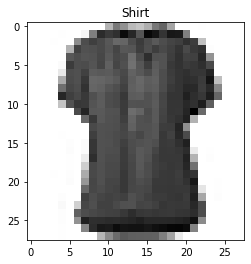

In [8]:
# plot an example image
index_of_choice = 55
plt.imshow(train_data[index_of_choice], cmap = plt.cm.binary)
plt.title(class_names[train_label[index_of_choice]])

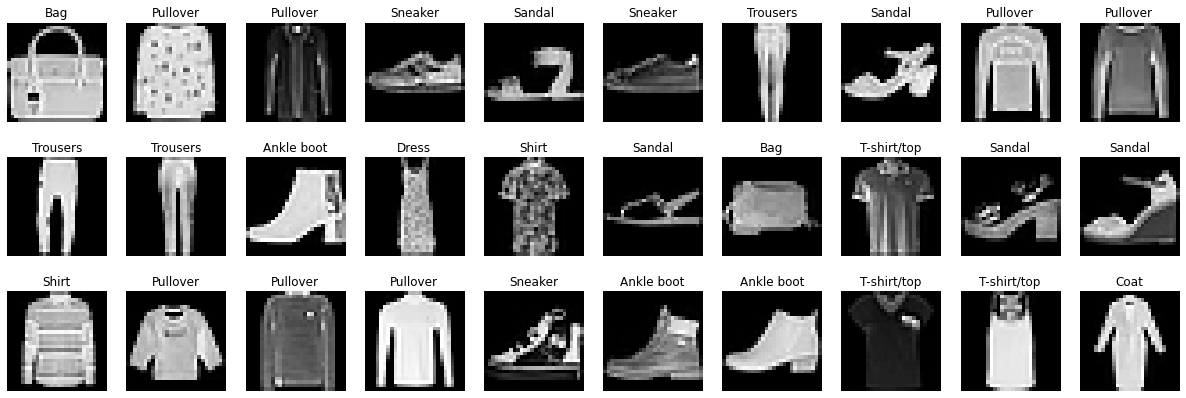

In [9]:
#plot mutiple random images

import random
plt.figure(figsize=(21,7))
for i in range(30):
    ax = plt.subplot(3,10,i+1)
    rand_index = random.choice(range(len(train_data)))
    plt.imshow(train_data[rand_index], cmap = plt.cm.binary_r)
    plt.title(class_names[train_label[rand_index]])
    plt.axis(False)

## Building a multiclass classification model

* a similiar architecure as in binary classifiers can be uesd, with a few tweaks
* input_shape = 28x28 (the shape (pixels) of the images)
* output_shape = 10 (one for class)
* Loss_function = tf.keras.losses.CategoricalCrossentropy for one_hot_encoded labels
* Loss_function = tf.keras.losses.SparseCategoricalCrossentropy for integer labels
* output_layer activation = softmax

In [10]:
flatten_model = tf.keras.Sequential([tf.keras.layers.Flatten(input_shape=(28,28))])
print(flatten_model.input_shape)
print(flatten_model.output_shape)
print(f"28x28= {28*28}")

(None, 28, 28)
(None, 784)
28x28= 784


In [11]:
tf.random.set_seed(42)

model_15 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)), # transform the inut in an vector
    tf.keras.layers.Dense(4, activation = 'relu'),
    tf.keras.layers.Dense(4, activation = 'relu'),
    tf.keras.layers.Dense(10, activation = 'softmax'),
])

model_15.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics='accuracy')

non_norm_history = model_15.fit(train_data, train_label, epochs =10, validation_data=(test_data, test_label))

Epoch 1/10
1875/1875 [==============================] - 1s 775us/step - loss: 2.1637 - accuracy: 0.1620 - val_loss: 1.7923 - val_accuracy: 0.2180
Epoch 2/10
1875/1875 [==============================] - 1s 691us/step - loss: 1.7032 - accuracy: 0.2549 - val_loss: 1.6518 - val_accuracy: 0.2843
Epoch 3/10
1875/1875 [==============================] - 1s 698us/step - loss: 1.6346 - accuracy: 0.2830 - val_loss: 1.6242 - val_accuracy: 0.2824
Epoch 4/10
1875/1875 [==============================] - 1s 680us/step - loss: 1.6107 - accuracy: 0.2853 - val_loss: 1.6089 - val_accuracy: 0.2885
Epoch 5/10
1875/1875 [==============================] - 1s 682us/step - loss: 1.5959 - accuracy: 0.3069 - val_loss: 1.5744 - val_accuracy: 0.3328
Epoch 6/10
1875/1875 [==============================] - 1s 682us/step - loss: 1.5901 - accuracy: 0.3089 - val_loss: 1.5717 - val_accuracy: 0.3059
Epoch 7/10
1875/1875 [==============================] - 1s 680us/step - loss: 1.5815 - accuracy: 0.3167 - val_loss: 1.5631 -

33.2 % accuracy is better than guessing, since we have 10 labels 

In [12]:
model_15.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 4)                 3140      
_________________________________________________________________
dense_1 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_2 (Dense)              (None, 10)                50        
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


In [13]:
# check min, max of train_data
train_data.min(), train_data.max()

(0, 255)

neural networks prefer data to be normalized (values between 0 & 1)

In [14]:
# divide train and test data by maximum

train_data_norm = train_data /255.0
test_data_norm = test_data/255.0

In [15]:
train_data_norm.min() , train_data_norm.max()

(0.0, 1.0)

In [16]:
#reuse model_15 with normalized data

tf.random.set_seed(42)

model_16 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)), # transform the inut in an vector
    tf.keras.layers.Dense(4, activation = 'relu'),
    tf.keras.layers.Dense(4, activation = 'relu'),
    tf.keras.layers.Dense(10, activation = 'softmax'),
])

model_16.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics='accuracy')

norm_history = model_16.fit(train_data_norm, train_label, epochs =10, validation_data=(test_data_norm, test_label))

Epoch 1/10
1875/1875 [==============================] - 1s 736us/step - loss: 1.0348 - accuracy: 0.6474 - val_loss: 0.6937 - val_accuracy: 0.7617
Epoch 2/10
1875/1875 [==============================] - 1s 667us/step - loss: 0.6376 - accuracy: 0.7757 - val_loss: 0.6400 - val_accuracy: 0.7820
Epoch 3/10
1875/1875 [==============================] - 1s 668us/step - loss: 0.5942 - accuracy: 0.7914 - val_loss: 0.6247 - val_accuracy: 0.7783
Epoch 4/10
1875/1875 [==============================] - 1s 688us/step - loss: 0.5750 - accuracy: 0.7979 - val_loss: 0.6078 - val_accuracy: 0.7881
Epoch 5/10
1875/1875 [==============================] - 1s 679us/step - loss: 0.5641 - accuracy: 0.8006 - val_loss: 0.6169 - val_accuracy: 0.7881
Epoch 6/10
1875/1875 [==============================] - 1s 668us/step - loss: 0.5544 - accuracy: 0.8043 - val_loss: 0.5855 - val_accuracy: 0.7951
Epoch 7/10
1875/1875 [==============================] - 1s 668us/step - loss: 0.5488 - accuracy: 0.8063 - val_loss: 0.6097 -


**Normalization improved the accuracy big times: from 33.% to 80.1% on the test data**

<AxesSubplot:title={'center':'Normalized data'}>

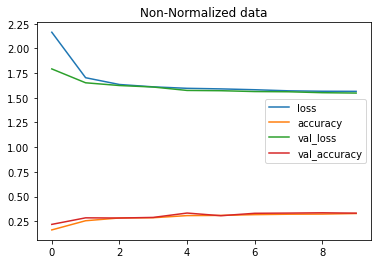

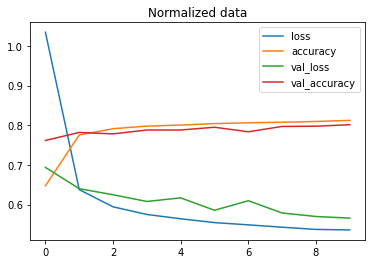

In [17]:
#plot non-normalized data loss curve

pd.DataFrame(non_norm_history.history).plot(title='Non-Normalized data')
pd.DataFrame(norm_history.history).plot(title='Normalized data')

Comparing results of the same model with slightly different data can produce *dramatically* different results.<br>
Hence either keep the data and chance the model or chance the data and keep the model. **Small steps** for improving the model!

Find the ideal learning rate

In [18]:
tf.random.set_seed(42)

model_17 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax'),
])

model_17.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(),
                metrics='accuracy')
# Create the learning rate callback

lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch : 1e-3 * 10**(epoch/20))

find_lr_history = model_17.fit(train_data_norm, train_label, epochs = 40 , callbacks=[lr_scheduler], validation_data=(test_data_norm, test_label))

Epoch 1/40
1875/1875 [==============================] - 1s 737us/step - loss: 1.0348 - accuracy: 0.6474 - val_loss: 0.6937 - val_accuracy: 0.7617
Epoch 2/40
1875/1875 [==============================] - 1s 671us/step - loss: 0.6366 - accuracy: 0.7759 - val_loss: 0.6400 - val_accuracy: 0.7808
Epoch 3/40
1875/1875 [==============================] - 1s 671us/step - loss: 0.5934 - accuracy: 0.7911 - val_loss: 0.6278 - val_accuracy: 0.7770
Epoch 4/40
1875/1875 [==============================] - 1s 671us/step - loss: 0.5749 - accuracy: 0.7969 - val_loss: 0.6122 - val_accuracy: 0.7871
Epoch 5/40
1875/1875 [==============================] - 1s 669us/step - loss: 0.5655 - accuracy: 0.7987 - val_loss: 0.6061 - val_accuracy: 0.7913
Epoch 6/40
1875/1875 [==============================] - 1s 697us/step - loss: 0.5569 - accuracy: 0.8022 - val_loss: 0.5917 - val_accuracy: 0.7940
Epoch 7/40
1875/1875 [==============================] - 1s 678us/step - loss: 0.5542 - accuracy: 0.8036 - val_loss: 0.5898 -

Text(0.5, 1.0, 'Finding ideal learning rate')

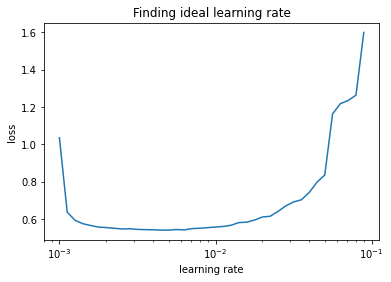

In [19]:
lrs= 1e-3 * (10**(tf.range(40)/20))
plt.semilogx(lrs, find_lr_history.history['loss'])
plt.xlabel('learning rate')
plt.ylabel('loss')
plt.title('Finding ideal learning rate')

the min is around lr=8 * 10e-3 -> lr_ideal is around 8 * 10e-2 ~ 10e-3 ( which is the default lr for Adam)

In [20]:
# refit the model with ideal lr

tf.random.set_seed(42)

model_18 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax'),
])

model_18.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics='accuracy')

history_18 = model_18.fit(train_data_norm, train_label, epochs = 20 , validation_data=(test_data_norm, test_label))

Epoch 1/20
1875/1875 [==============================] - 1s 748us/step - loss: 1.0348 - accuracy: 0.6474 - val_loss: 0.6937 - val_accuracy: 0.7617
Epoch 2/20
1875/1875 [==============================] - 1s 671us/step - loss: 0.6376 - accuracy: 0.7757 - val_loss: 0.6400 - val_accuracy: 0.7820
Epoch 3/20
1875/1875 [==============================] - 1s 704us/step - loss: 0.5942 - accuracy: 0.7914 - val_loss: 0.6247 - val_accuracy: 0.7783
Epoch 4/20
1875/1875 [==============================] - 1s 672us/step - loss: 0.5750 - accuracy: 0.7979 - val_loss: 0.6078 - val_accuracy: 0.7881
Epoch 5/20
1875/1875 [==============================] - 1s 671us/step - loss: 0.5641 - accuracy: 0.8006 - val_loss: 0.6169 - val_accuracy: 0.7881
Epoch 6/20
1875/1875 [==============================] - 1s 675us/step - loss: 0.5544 - accuracy: 0.8043 - val_loss: 0.5855 - val_accuracy: 0.7951
Epoch 7/20
1875/1875 [==============================] - 1s 673us/step - loss: 0.5488 - accuracy: 0.8063 - val_loss: 0.6097 -

## Evaluate the model

In [21]:
def plot_confusion_matrix(y_true, y_pred, classes=None, figsize=(10,10), text_size=15):
    
    import itertools
    from sklearn.metrics import confusion_matrix
    
    
    # reshaping y_pred
    y_pred = tf.squeeze(y_pred)
    
    
    #create the confusion matrix
    cm = confusion_matrix(y_true, y_pred) # confusion_matrix from sklearn!
    cm_norm = cm.astype('float')/cm.sum(axis=1)[:, np.newaxis] 
    n_classes = cm.shape[0]

    #Let's prettify
    fig, ax = plt.subplots(figsize=figsize)

    # Create a matrix plot
    cax = ax.matshow(cm, cmap=plt.cm.Blues)
    fig.colorbar(cax)

    #cerate classes

    if not classes:
        labels = np.arange(cm.shape[0])
    else:
        labels = classes

    #label the axes
    ax.set(title='Confusion matrix',
          xlabel='Predicted Label',
          ylabel='True Label',
          xticks=np.arange(n_classes),
          yticks=np.arange(n_classes),
          xticklabels=labels,
          yticklabels=labels,)

    # Set x-labels to bottom
    ax.xaxis.set_label_position('bottom')
    ax.xaxis.tick_bottom()

    # Adjust label size
    ax.yaxis.label.set_size(text_size)
    ax.xaxis.label.set_size(text_size)
    ax.title.set_size(text_size + 5)

    # Set threshold for different colors
    threshold = (cm.max() + cm.min())/2.

    # Plot the text on each cell
    for i,j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j,i, f"{cm[i,j]} ({cm_norm[i,j]*100:.1f}%)",
                horizontalalignment='center',
                color='white' if cm[i,j] > threshold else 'black',
                size=text_size)

In [22]:
y_probs = model_18.predict(test_data_norm)

y_probs[:5]

array([[8.56298019e-11, 3.53616252e-13, 2.66337756e-05, 4.63561953e-08,
        5.09497040e-05, 9.61193666e-02, 8.17781896e-08, 9.18689221e-02,
        4.06052731e-03, 8.07873547e-01],
       [3.42785211e-06, 1.28992159e-16, 9.59891498e-01, 2.05163147e-07,
        1.53291877e-02, 2.45323401e-13, 2.41428781e-02, 1.13834485e-28,
        6.32722571e-04, 4.47892141e-08],
       [6.10630595e-05, 9.96576726e-01, 4.38671428e-08, 3.34058655e-03,
        1.32495097e-05, 1.43834339e-21, 8.27906115e-06, 7.32382985e-18,
        5.48116041e-08, 4.92254248e-14],
       [7.50313629e-05, 9.90536869e-01, 4.25286942e-07, 9.22316313e-03,
        1.36231683e-04, 1.82763695e-18, 2.68082422e-05, 4.81250172e-14,
        1.45215347e-06, 2.22115451e-11],
       [7.21898302e-02, 1.54957206e-06, 2.55669117e-01, 1.03631085e-02,
        4.35413457e-02, 1.10694494e-13, 6.16930127e-01, 6.75444038e-23,
        1.30491669e-03, 1.21403809e-09]], dtype=float32)

In [23]:
y_preds = y_probs.argmax(axis=1)
y_preds

array([9, 2, 1, ..., 3, 1, 5], dtype=int64)

In [24]:
class_names

['T-shirt/top',
 'Trousers',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

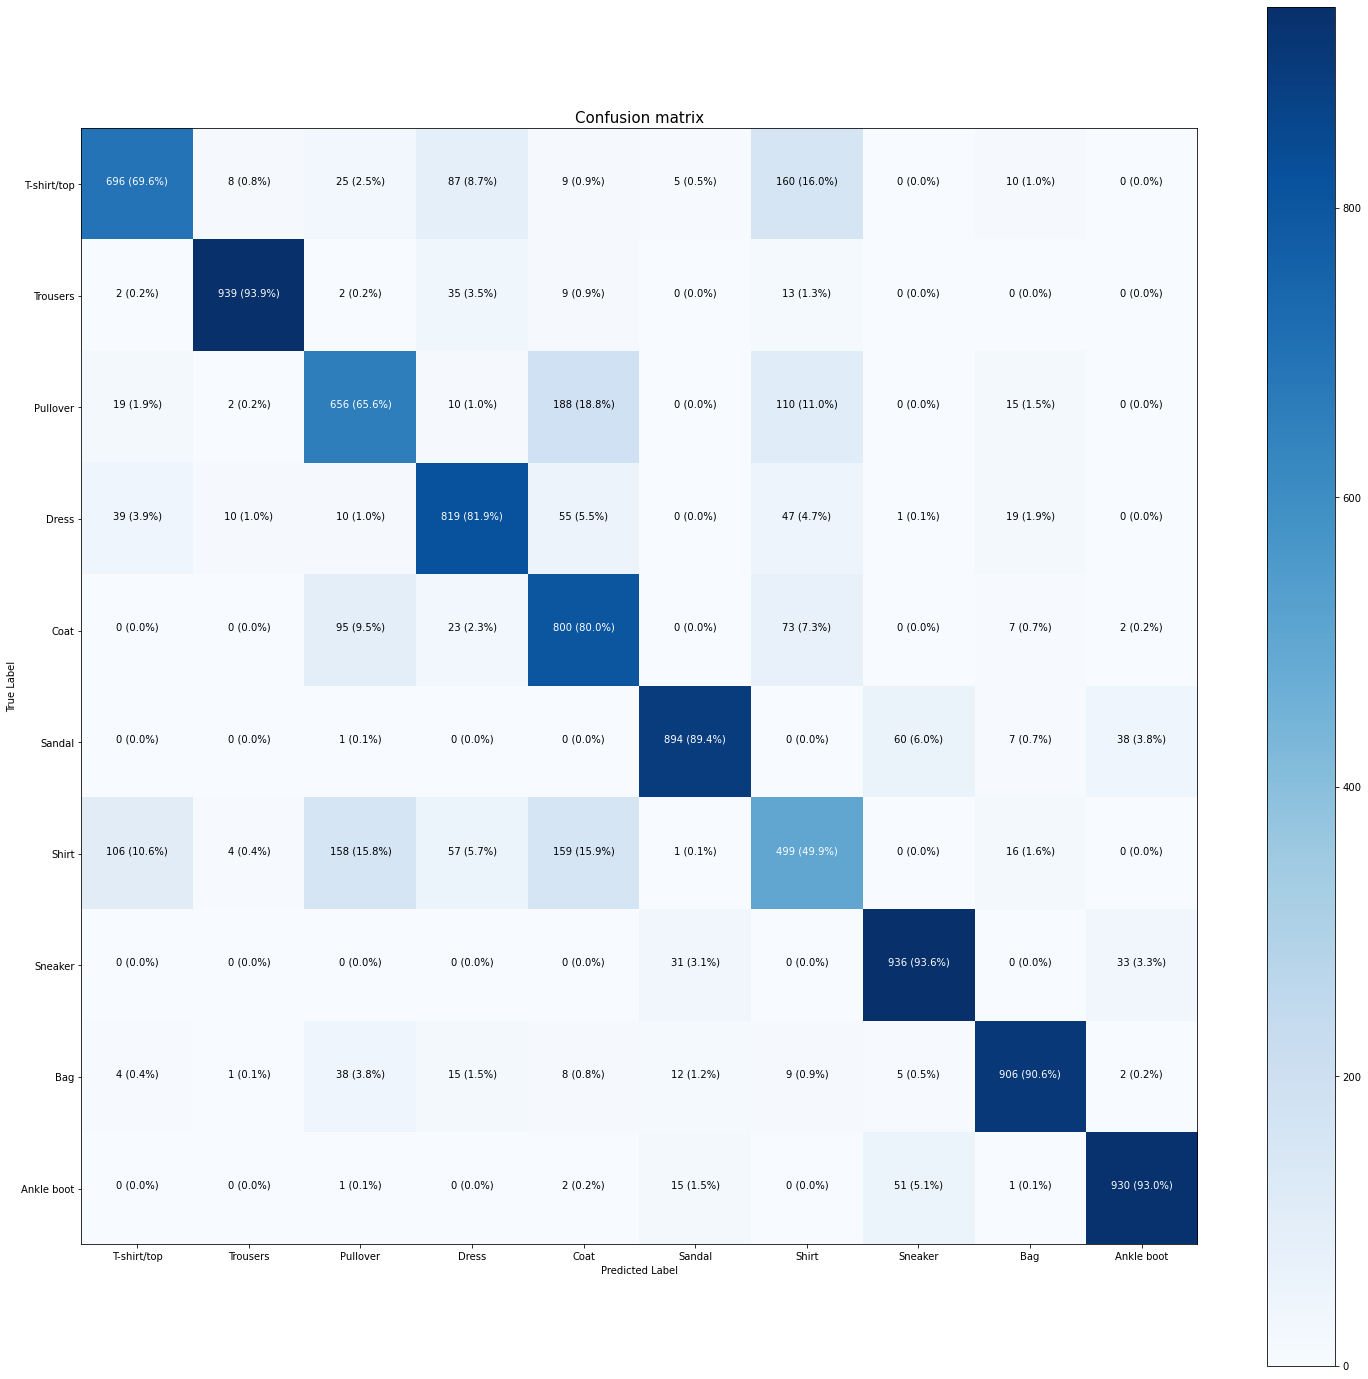

In [25]:
plot_confusion_matrix(test_label, y_preds, classes=class_names, figsize=(25,25), text_size=10)

**Note: ** Working with images and other forms of visual data, it's a good idea to visualize as much as possoble to develop a further understanding of the data and the inputs and outputs of the model <br>

Create :
* a little function
* Make a prediction on said image
* label the plot with the truth label & the predicted label

In [28]:
import random

def plot_random_image(model, images, true_labels, classes):
    """
    Picks a random image, plots it and labels it with a prediction and truth label
    """
    
    # set  up a random integer
    i = random.randint(0, len(images))

    # Create predictions and targets    
    target_image = images[i]
    pred_probs = model.predict(target_image.reshape(1, 28,28))
    pred_label = classes[pred_probs.argmax()]
    true_label = classes[true_labels[i]]
    
    # plot the image
    plt.imshow(target_image , cmap=plt.cm.binary)
    
    #Change the color of the titles depending on if the prediction is right or wrong
        
    if pred_label == true_label:
        color = 'green'
    else:
        color = 'red'
     
    # Add xlabel information ( prediction/true label)
    plt.xlabel('Pred: {} {:2.0f}% (True: {})'.format(pred_label, 100*tf.reduce_max(pred_probs),
                                                    true_label),
              color=color)
        

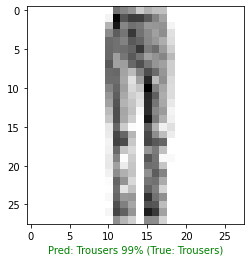

In [29]:
plot_random_image(model = model_18,
                  images= test_data_norm,
                 true_labels = test_label,
                 classes = class_names)

### What patterns is the model learning?

In [30]:
# Find the layers of the latest model

model_18.layers

In [40]:
#Extract the first hidden dense layer

model_18.layers[1]

In [41]:
# Get the pattersn of a layer in a model

weights, biases =model_18.layers[1].get_weights()

weights, weights.shape

(array([[ 0.7150262 , -0.06077073, -0.9976306 , -1.0484309 ],
        [ 0.2773212 , -0.4715532 , -0.5291646 ,  0.02329259],
        [ 0.7752431 ,  0.54027635, -1.128857  , -0.7426155 ],
        ...,
        [-0.3945345 ,  0.47628665, -0.22641487,  0.2550592 ],
        [-0.40515786,  0.61810064,  0.23928419, -0.50387615],
        [ 0.238846  ,  0.11606903, -0.12131368,  0.04352422]],
       dtype=float32),
 (784, 4))

In [42]:
model_18.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_4 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 4)                 3140      
_________________________________________________________________
dense_10 (Dense)             (None, 4)                 20        
_________________________________________________________________
dense_11 (Dense)             (None, 10)                50        
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


In [43]:
# check the biases vector

biases, biases.shape

(array([ 2.448589e-02, -6.148446e-04, -2.723020e-01,  8.112485e-01],
       dtype=float32),
 (4,))

Every neuron has a bias vector. Each of these is paired with a weights matrix.

The bias vector is (by default) initialized as zero vector.

The bias vector dictates how much the patterns within the corresponding weights matrix should influence the next layer

In [46]:
# extract weights and biases of hidden layer 2

weights, biases =model_18.layers[2].get_weights()

weights, weights.shape

(array([[ 1.0736774 , -0.19358195,  0.50725406, -0.3560664 ],
        [ 0.34898195,  1.134145  ,  0.84305024,  0.5526554 ],
        [ 0.09337553,  0.46247578, -0.6996277 ,  0.58674854],
        [-0.32451475, -0.21780205,  0.566656  ,  1.275238  ]],
       dtype=float32),
 (4, 4))

In [45]:
biases, biases.shape

(array([-0.6508778 , -0.28385457,  0.28233308, -0.3790995 ], dtype=float32),
 (4,))

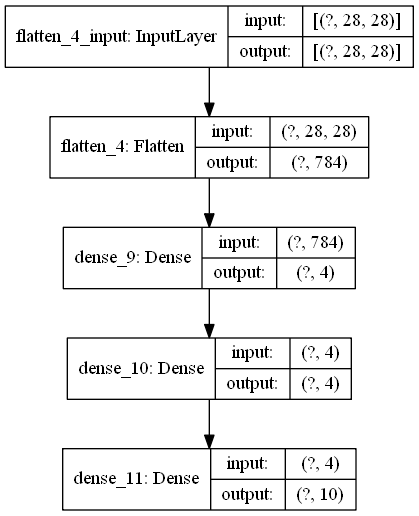

In [49]:
# another way to view a model the ? indicates the batch size
tf.keras.utils.plot_model(model_18, show_shapes=True)

# Exercise:

Building a model which reaches 88%+ accuracy

In [77]:
tf.random.set_seed(42)

model_19 = tf.keras.Sequential(name='ZalandoClassifier_1')

model_19.add(tf.keras.layers.Flatten(input_shape=(28,28), name='input'))
model_19.add(tf.keras.layers.Dense(10, 
                                   activation='relu', 
                                   use_bias=True,
                                   kernel_initializer='glorot_uniform',
                                   bias_initializer='zeros', kernel_regularizer=None,
                                   bias_regularizer=None, activity_regularizer=None, kernel_constraint=None, bias_constraint=None, name = 'hidden_1'))
model_19.add(tf.keras.layers.Dense(10, 
                                   activation='relu', 
                                   use_bias=True,
                                   kernel_initializer='glorot_uniform',
                                   bias_initializer='zeros', kernel_regularizer=None,
                                   bias_regularizer=None, activity_regularizer=None, kernel_constraint=None, bias_constraint=None, name= 'hidden_2'))
model_19.add(tf.keras.layers.Dense(10, 
                                   activation='relu', 
                                   use_bias=True,
                                   kernel_initializer='glorot_uniform',
                                   bias_initializer='zeros', kernel_regularizer=None,
                                   bias_regularizer=None, activity_regularizer=None, kernel_constraint=None, bias_constraint=None, name='hidden_3'))
model_19.add(tf.keras.layers.Dense(10, 
                                   activation='softmax', 
                                   use_bias=True,
                                   kernel_initializer='glorot_uniform',
                                   bias_initializer='zeros', kernel_regularizer=None,
                                   bias_regularizer=None, activity_regularizer=None, kernel_constraint=None, bias_constraint=None, name='output'))


model_19.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(),
                metrics = 'accuracy')

history_19 = model_19.fit(train_data_norm, train_label, epochs= 25, validation_data=(test_data_norm, test_label))

Epoch 1/25
1875/1875 [==============================] - 2s 825us/step - loss: 0.7036 - accuracy: 0.7516 - val_loss: 0.5208 - val_accuracy: 0.8222
Epoch 2/25
1875/1875 [==============================] - 1s 739us/step - loss: 0.4793 - accuracy: 0.8354 - val_loss: 0.5242 - val_accuracy: 0.8185
Epoch 3/25
1875/1875 [==============================] - 1s 743us/step - loss: 0.4478 - accuracy: 0.8456 - val_loss: 0.4768 - val_accuracy: 0.8299
Epoch 4/25
1875/1875 [==============================] - 1s 772us/step - loss: 0.4304 - accuracy: 0.8507 - val_loss: 0.4530 - val_accuracy: 0.8423
Epoch 5/25
1875/1875 [==============================] - 1s 739us/step - loss: 0.4159 - accuracy: 0.8541 - val_loss: 0.4635 - val_accuracy: 0.8373
Epoch 6/25
1875/1875 [==============================] - 1s 740us/step - loss: 0.4043 - accuracy: 0.8580 - val_loss: 0.4596 - val_accuracy: 0.8340
Epoch 7/25
1875/1875 [==============================] - 1s 746us/step - loss: 0.3954 - accuracy: 0.8605 - val_loss: 0.4482 -

<AxesSubplot:>

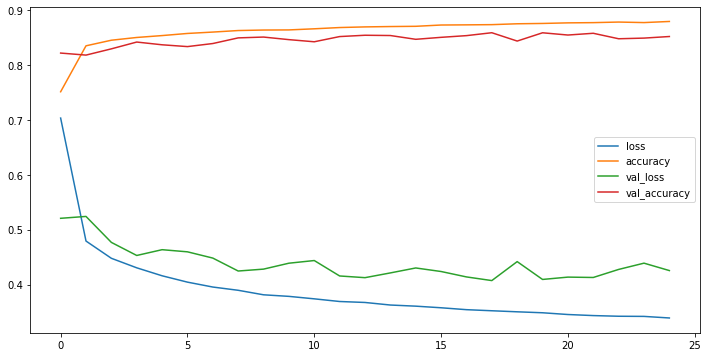

In [78]:
h19 = history_19.history
pd.DataFrame(h19).plot(figsize=(12,6))

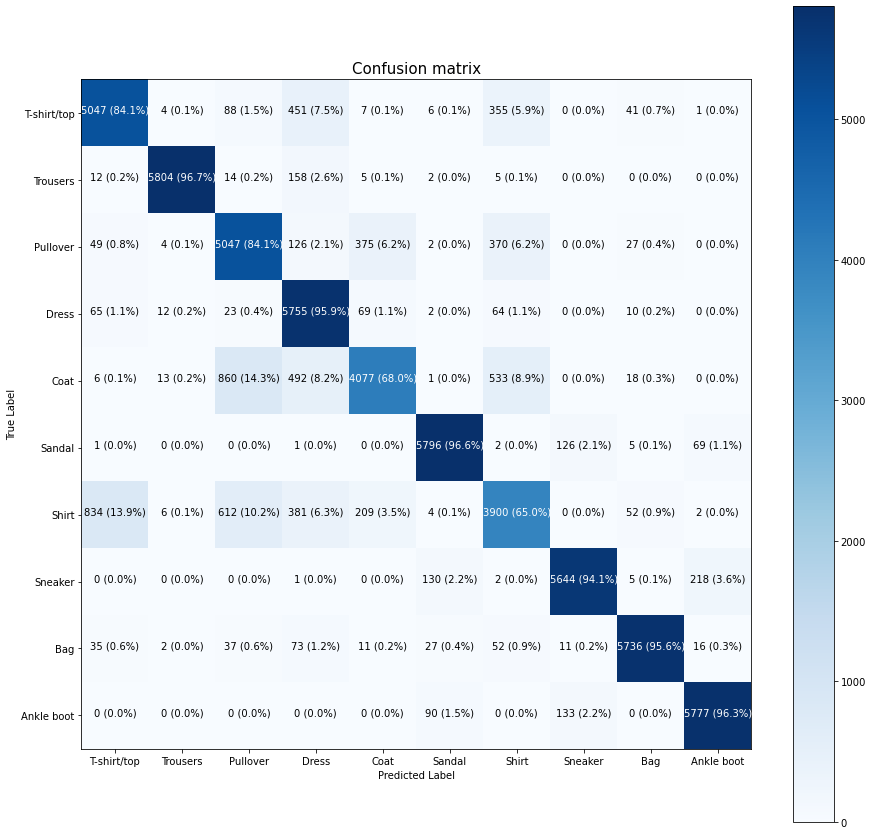

In [79]:
y_probs = model_19.predict(train_data_norm)
y_preds = y_probs.argmax(axis=1)
y_preds

plot_confusion_matrix(y_true=train_label,
                      y_pred=y_preds,
                     classes=class_names,
                     figsize=(15,15),
                     text_size=10)

In [80]:
tf.random.set_seed(42)

model_20 = tf.keras.Sequential(name='ZalandoClassifier_2')

model_20.add(tf.keras.layers.Flatten(input_shape=(28,28), name='input'))
model_20.add(tf.keras.layers.Dense(10, 
                                   activation='relu', 
                                   use_bias=True,
                                   kernel_initializer='glorot_uniform',
                                   bias_initializer='zeros', kernel_regularizer=None,
                                   bias_regularizer=None, activity_regularizer=None, kernel_constraint=None, bias_constraint=None, name = 'hidden_1'))
model_20.add(tf.keras.layers.Dense(10, 
                                   activation='relu', 
                                   use_bias=True,
                                   kernel_initializer='glorot_uniform',
                                   bias_initializer='zeros', kernel_regularizer=None,
                                   bias_regularizer=None, activity_regularizer=None, kernel_constraint=None, bias_constraint=None, name= 'hidden_2'))
model_20.add(tf.keras.layers.Dense(10, 
                                   activation='relu', 
                                   use_bias=True,
                                   kernel_initializer='glorot_uniform',
                                   bias_initializer='zeros', kernel_regularizer=None,
                                   bias_regularizer=None, activity_regularizer=None, kernel_constraint=None, bias_constraint=None, name='hidden_3'))
model_20.add(tf.keras.layers.Dense(10, 
                                   activation='relu', 
                                   use_bias=True,
                                   kernel_initializer='glorot_uniform',
                                   bias_initializer='zeros', kernel_regularizer=None,
                                   bias_regularizer=None, activity_regularizer=None, kernel_constraint=None, bias_constraint=None, name='hidden_4'))
model_20.add(tf.keras.layers.Dense(10, 
                                   activation='softmax', 
                                   use_bias=True,
                                   kernel_initializer='glorot_uniform',
                                   bias_initializer='zeros', kernel_regularizer=None,
                                   bias_regularizer=None, activity_regularizer=None, kernel_constraint=None, bias_constraint=None, name='output'))


model_20.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(),
                metrics = 'accuracy')

history_20 = model_20.fit(train_data_norm, train_label, epochs= 25, validation_data=(test_data_norm, test_label))

Epoch 1/25
1875/1875 [==============================] - 2s 866us/step - loss: 0.7564 - accuracy: 0.7265 - val_loss: 0.5545 - val_accuracy: 0.8046
Epoch 2/25
1875/1875 [==============================] - 1s 776us/step - loss: 0.5035 - accuracy: 0.8229 - val_loss: 0.5072 - val_accuracy: 0.8214
Epoch 3/25
1875/1875 [==============================] - 1s 766us/step - loss: 0.4613 - accuracy: 0.8376 - val_loss: 0.5038 - val_accuracy: 0.8179
Epoch 4/25
1875/1875 [==============================] - 1s 763us/step - loss: 0.4376 - accuracy: 0.8463 - val_loss: 0.4718 - val_accuracy: 0.8334
Epoch 5/25
1875/1875 [==============================] - 1s 770us/step - loss: 0.4202 - accuracy: 0.8513 - val_loss: 0.4577 - val_accuracy: 0.8423
Epoch 6/25
1875/1875 [==============================] - 1s 764us/step - loss: 0.4065 - accuracy: 0.8550 - val_loss: 0.4820 - val_accuracy: 0.8255
Epoch 7/25
1875/1875 [==============================] - 1s 769us/step - loss: 0.3989 - accuracy: 0.8573 - val_loss: 0.4519 -

In [81]:
tf.random.set_seed(42)

model_21 = tf.keras.Sequential(name='ZalandoClassifier_3')

model_21.add(tf.keras.layers.Flatten(input_shape=(28,28), name='input'))
model_21.add(tf.keras.layers.Dense(20, 
                                   activation='relu', 
                                   use_bias=True,
                                   kernel_initializer='glorot_uniform',
                                   bias_initializer='zeros', kernel_regularizer=None,
                                   bias_regularizer=None, activity_regularizer=None, kernel_constraint=None, bias_constraint=None, name = 'hidden_1'))
model_21.add(tf.keras.layers.Dense(20, 
                                   activation='relu', 
                                   use_bias=True,
                                   kernel_initializer='glorot_uniform',
                                   bias_initializer='zeros', kernel_regularizer=None,
                                   bias_regularizer=None, activity_regularizer=None, kernel_constraint=None, bias_constraint=None, name= 'hidden_2'))

model_21.add(tf.keras.layers.Dense(10, 
                                   activation='softmax', 
                                   use_bias=True,
                                   kernel_initializer='glorot_uniform',
                                   bias_initializer='zeros', kernel_regularizer=None,
                                   bias_regularizer=None, activity_regularizer=None, kernel_constraint=None, bias_constraint=None, name='output'))


model_21.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(),
                metrics = 'accuracy')

history_21 = model_21.fit(train_data_norm, train_label, epochs= 25, validation_data=(test_data_norm, test_label))

Epoch 1/25
1875/1875 [==============================] - 2s 860us/step - loss: 0.5796 - accuracy: 0.8003 - val_loss: 0.4699 - val_accuracy: 0.8354
Epoch 2/25
1875/1875 [==============================] - 1s 775us/step - loss: 0.4192 - accuracy: 0.8514 - val_loss: 0.4908 - val_accuracy: 0.8348
Epoch 3/25
1875/1875 [==============================] - 1s 764us/step - loss: 0.3908 - accuracy: 0.8609 - val_loss: 0.4200 - val_accuracy: 0.8517
Epoch 4/25
1875/1875 [==============================] - 1s 767us/step - loss: 0.3699 - accuracy: 0.8688 - val_loss: 0.4251 - val_accuracy: 0.8521
Epoch 5/25
1875/1875 [==============================] - 1s 778us/step - loss: 0.3574 - accuracy: 0.8715 - val_loss: 0.4152 - val_accuracy: 0.8528
Epoch 6/25
1875/1875 [==============================] - 1s 766us/step - loss: 0.3458 - accuracy: 0.8755 - val_loss: 0.4388 - val_accuracy: 0.8425
Epoch 7/25
1875/1875 [==============================] - 1s 773us/step - loss: 0.3379 - accuracy: 0.8779 - val_loss: 0.4262 -

<AxesSubplot:>

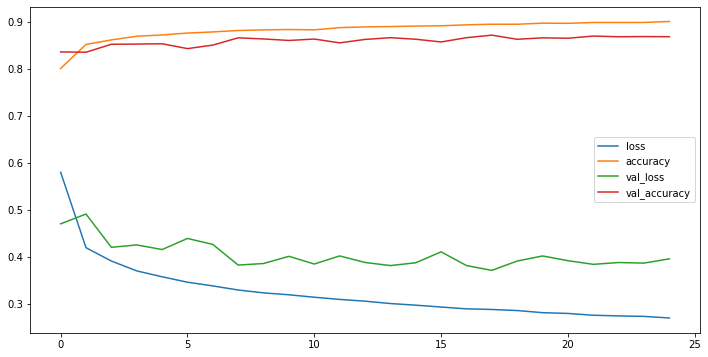

In [82]:
h21 = history_21.history
pd.DataFrame(h21).plot(figsize=(12,6))

Epoch 1/25
1875/1875 [==============================] - 2s 864us/step - loss: 0.6058 - accuracy: 0.7876 - val_loss: 0.4702 - val_accuracy: 0.8330
Epoch 2/25
1875/1875 [==============================] - 2s 806us/step - loss: 0.4250 - accuracy: 0.8498 - val_loss: 0.4605 - val_accuracy: 0.8382
Epoch 3/25
1875/1875 [==============================] - 2s 802us/step - loss: 0.3911 - accuracy: 0.8611 - val_loss: 0.4250 - val_accuracy: 0.8502
Epoch 4/25
1875/1875 [==============================] - 2s 850us/step - loss: 0.3690 - accuracy: 0.8667 - val_loss: 0.4170 - val_accuracy: 0.8502
Epoch 5/25
1875/1875 [==============================] - 2s 815us/step - loss: 0.3554 - accuracy: 0.8702 - val_loss: 0.4130 - val_accuracy: 0.8512
Epoch 6/25
1875/1875 [==============================] - 1s 794us/step - loss: 0.3426 - accuracy: 0.8738 - val_loss: 0.4125 - val_accuracy: 0.8500
Epoch 7/25
1875/1875 [==============================] - 1s 791us/step - loss: 0.3361 - accuracy: 0.8766 - val_loss: 0.4200 -

<AxesSubplot:>

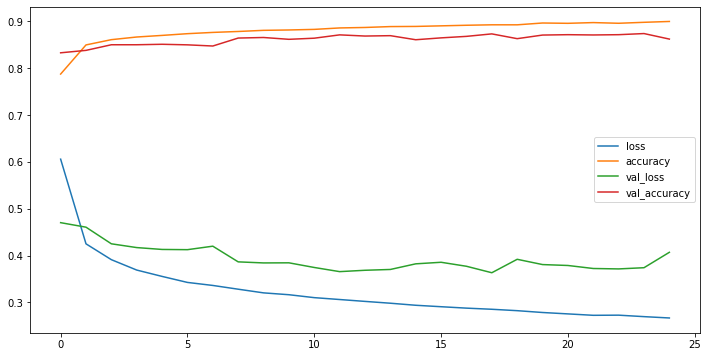

In [84]:
tf.random.set_seed(42)

model_22 = tf.keras.Sequential(name='ZalandoClassifier_4')

model_22.add(tf.keras.layers.Flatten(input_shape=(28,28), name='input'))
model_22.add(tf.keras.layers.Dense(20, 
                                   activation='relu', 
                                   use_bias=True,
                                   kernel_initializer='glorot_uniform',
                                   bias_initializer='zeros', kernel_regularizer=None,
                                   bias_regularizer=None, activity_regularizer=None, kernel_constraint=None, bias_constraint=None, name = 'hidden_1'))
model_22.add(tf.keras.layers.Dense(20, 
                                   activation='relu', 
                                   use_bias=True,
                                   kernel_initializer='glorot_uniform',
                                   bias_initializer='zeros', kernel_regularizer=None,
                                   bias_regularizer=None, activity_regularizer=None, kernel_constraint=None, bias_constraint=None, name= 'hidden_2'))
model_22.add(tf.keras.layers.Dense(20, 
                                   activation='relu', 
                                   use_bias=True,
                                   kernel_initializer='glorot_uniform',
                                   bias_initializer='zeros', kernel_regularizer=None,
                                   bias_regularizer=None, activity_regularizer=None, kernel_constraint=None, bias_constraint=None, name= 'hidden_3'))

model_22.add(tf.keras.layers.Dense(10, 
                                   activation='softmax', 
                                   use_bias=True,
                                   kernel_initializer='glorot_uniform',
                                   bias_initializer='zeros', kernel_regularizer=None,
                                   bias_regularizer=None, activity_regularizer=None, kernel_constraint=None, bias_constraint=None, name='output'))


model_22.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(),
                metrics = 'accuracy')

history_22 = model_22.fit(train_data_norm, train_label, epochs= 25, validation_data=(test_data_norm, test_label))

h22 = history_22.history
pd.DataFrame(h22).plot(figsize=(12,6))

<AxesSubplot:>

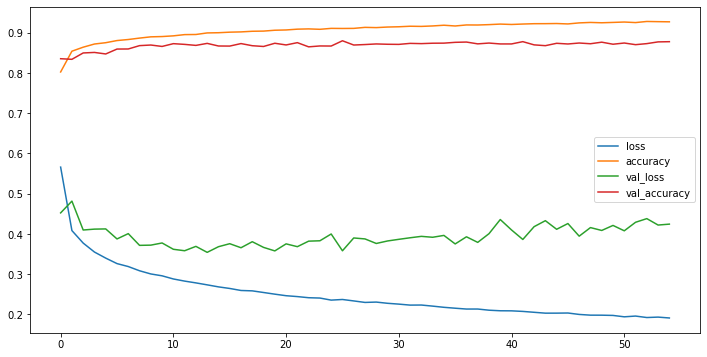

In [101]:
tf.random.set_seed(42)

model_23 = tf.keras.Sequential(name='ZalandoClassifier_4')

model_23.add(tf.keras.layers.Flatten(input_shape=(28,28), name='input'))
model_23.add(tf.keras.layers.Dense(32, 
                                   activation='relu', 
                                   use_bias=True,
                                   kernel_initializer='glorot_uniform',
                                   bias_initializer='zeros', kernel_regularizer=None,
                                   bias_regularizer=None, activity_regularizer=None, kernel_constraint=None, bias_constraint=None, name = 'hidden_1'))
model_23.add(tf.keras.layers.Dense(24, 
                                   activation='relu', 
                                   use_bias=True,
                                   kernel_initializer='glorot_uniform',
                                   bias_initializer='zeros', kernel_regularizer=None,
                                   bias_regularizer=None, activity_regularizer=None, kernel_constraint=None, bias_constraint=None, name= 'hidden_2'))
model_23.add(tf.keras.layers.Dense(24, 
                                   activation='relu', 
                                   use_bias=True,
                                   kernel_initializer='glorot_uniform',
                                   bias_initializer='zeros', kernel_regularizer=None,
                                   bias_regularizer=None, activity_regularizer=None, kernel_constraint=None, bias_constraint=None, name= 'hidden_3'))

model_23.add(tf.keras.layers.Dense(10, 
                                   activation='softmax', 
                                   use_bias=True,
                                   kernel_initializer='glorot_uniform',
                                   bias_initializer='zeros', kernel_regularizer=None,
                                   bias_regularizer=None, activity_regularizer=None, kernel_constraint=None, bias_constraint=None, name='output'))


model_23.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(),
                metrics = 'accuracy')

history_23 = model_23.fit(train_data_norm, train_label, epochs= 55, verbose =0, validation_data=(test_data_norm, test_label))

h23 = history_23.history
pd.DataFrame(h23).plot(figsize=(12,6))

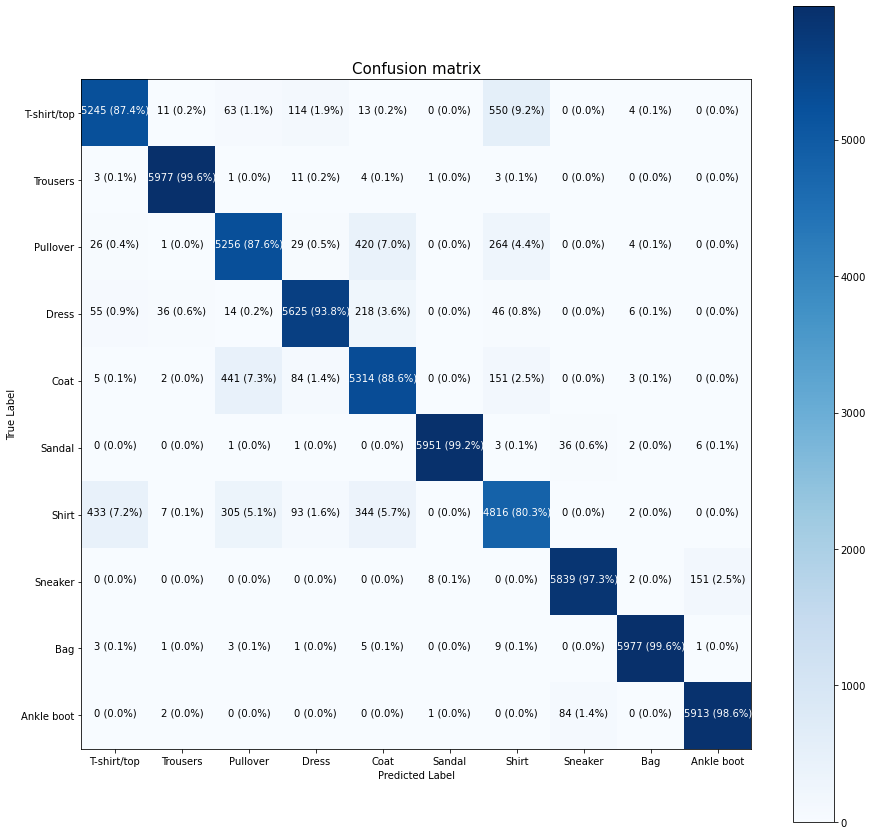

In [102]:
y_probs = model_23.predict(train_data_norm)
y_preds = y_probs.argmax(axis=1)
y_preds

plot_confusion_matrix(y_true=train_label,
                      y_pred=y_preds,
                     classes=class_names,
                     figsize=(15,15),
                     text_size=10)

In [103]:
y_probs = model_23.predict(test_data_norm)
y_preds = y_probs.argmax(axis=1)
y_preds

m = tf.keras.metrics.Accuracy()
m.update_state(test_label, y_preds)
print(f"Accuracy: {m.result().numpy()*100:.4f}%") 

Accuracy: 87.7700%


<AxesSubplot:>

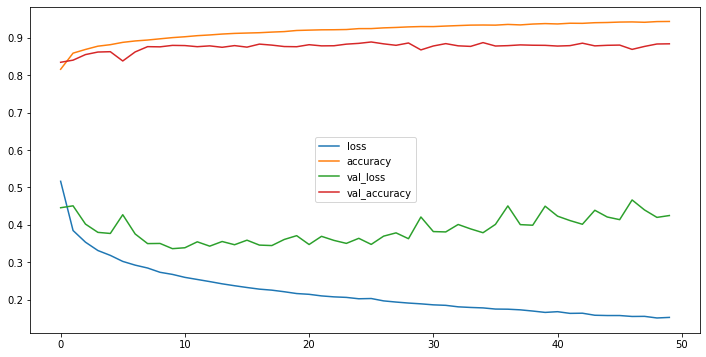

In [133]:
tf.random.set_seed(42)

model_24 = tf.keras.Sequential(name='ZalandoClassifier_4')

model_24.add(tf.keras.layers.Flatten(input_shape=(28,28), name='input'))
model_24.add(tf.keras.layers.Dense(48, 
                                   activation='elu', 
                                   use_bias=True,
                                   kernel_initializer='glorot_uniform',
                                   bias_initializer='zeros', kernel_regularizer=None,
                                   bias_regularizer=None, activity_regularizer=None, kernel_constraint=None, bias_constraint=None, name = 'hidden_1'))
model_24.add(tf.keras.layers.Dense(24, 
                                   activation='elu', 
                                   use_bias=True,
                                   kernel_initializer='glorot_uniform',
                                   bias_initializer='zeros', kernel_regularizer=None,
                                   bias_regularizer=None, activity_regularizer=None, kernel_constraint=None, bias_constraint=None, name= 'hidden_2'))
model_24.add(tf.keras.layers.Dense(24, 
                                   activation='elu', 
                                   use_bias=True,
                                   kernel_initializer='glorot_uniform',
                                   bias_initializer='zeros', kernel_regularizer=None,
                                   bias_regularizer=None, activity_regularizer=None, kernel_constraint=None, bias_constraint=None, name= 'hidden_3'))
model_24.add(tf.keras.layers.Dense(20, 
                                   activation='elu', 
                                   use_bias=True,
                                   kernel_initializer='glorot_uniform',
                                   bias_initializer='zeros', kernel_regularizer=None,
                                   bias_regularizer=None, activity_regularizer=None, kernel_constraint=None, bias_constraint=None, name= 'hidden_4'))
model_24.add(tf.keras.layers.Dense(20, 
                                   activation='elu', 
                                   use_bias=True,
                                   kernel_initializer='glorot_uniform',
                                   bias_initializer='zeros', kernel_regularizer=None,
                                   bias_regularizer=None, activity_regularizer=None, kernel_constraint=None, bias_constraint=None, name= 'hidden_5'))

model_24.add(tf.keras.layers.Dense(10, 
                                   activation='softmax', 
                                   use_bias=True,
                                   kernel_initializer='glorot_uniform',
                                   bias_initializer='zeros', kernel_regularizer=None,
                                   bias_regularizer=None, activity_regularizer=None, kernel_constraint=None, bias_constraint=None, name='output'))


model_24.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(),
                metrics = 'accuracy')

history_24 = model_24.fit(train_data_norm, train_label, epochs= 50, verbose =0, validation_data=(test_data_norm, test_label))

h24 = history_24.history
pd.DataFrame(h24).plot(figsize=(12,6))

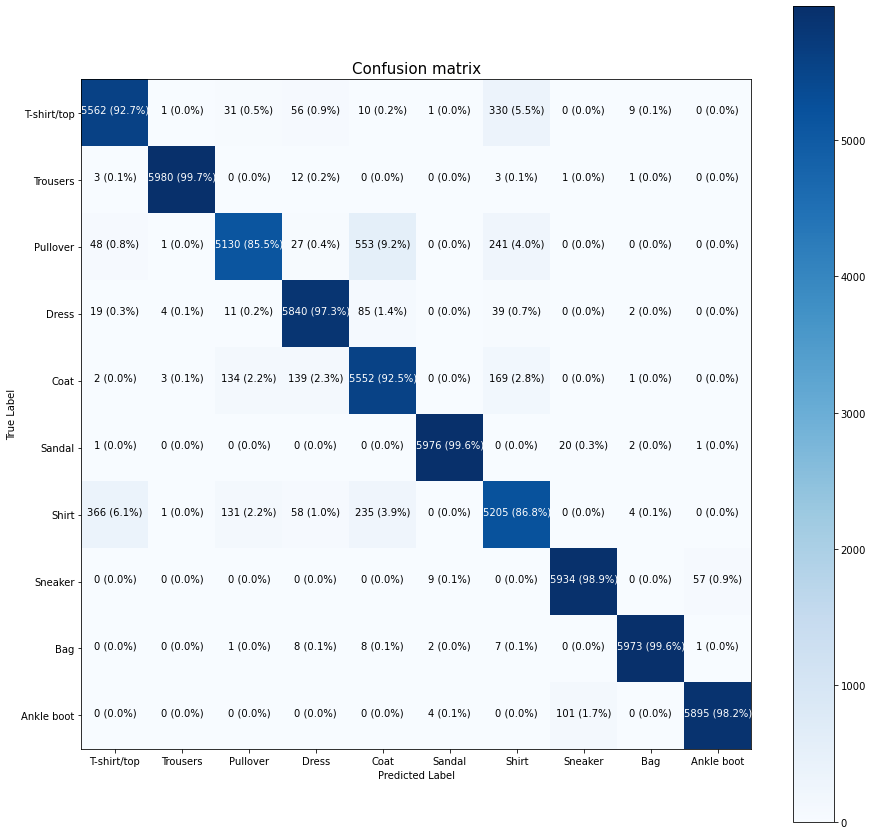

In [134]:
y_probs = model_24.predict(train_data_norm)
y_preds = y_probs.argmax(axis=1)
y_preds

plot_confusion_matrix(y_true=train_label,
                      y_pred=y_preds,
                     classes=class_names,
                     figsize=(15,15),
                     text_size=10)

In [135]:
y_probs = model_24.predict(test_data_norm)
y_preds = y_probs.argmax(axis=1)
y_preds

m = tf.keras.metrics.Accuracy()
m.update_state(test_label, y_preds)
print(f"Accuracy: {m.result().numpy()*100:.4f}%") 

Accuracy: 88.4000%


Uff... finally!

In [129]:
path = 'C:\\Users\\neema\\Notebooks\\Udemy_TensorFlow'
path = path +  '\ZalandoClassifier.h5'
model_24.save(path)